In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
dt = pd.read_csv('../data/advertising.csv')
dt.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
dt.shape

(200, 4)

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
dt.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
dt.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<AxesSubplot:>

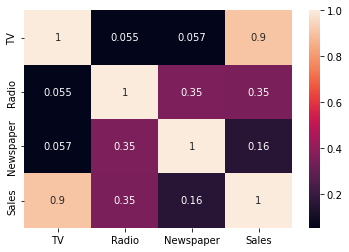

In [7]:
import seaborn as sns
sns.heatmap(dt.corr(),annot=True)

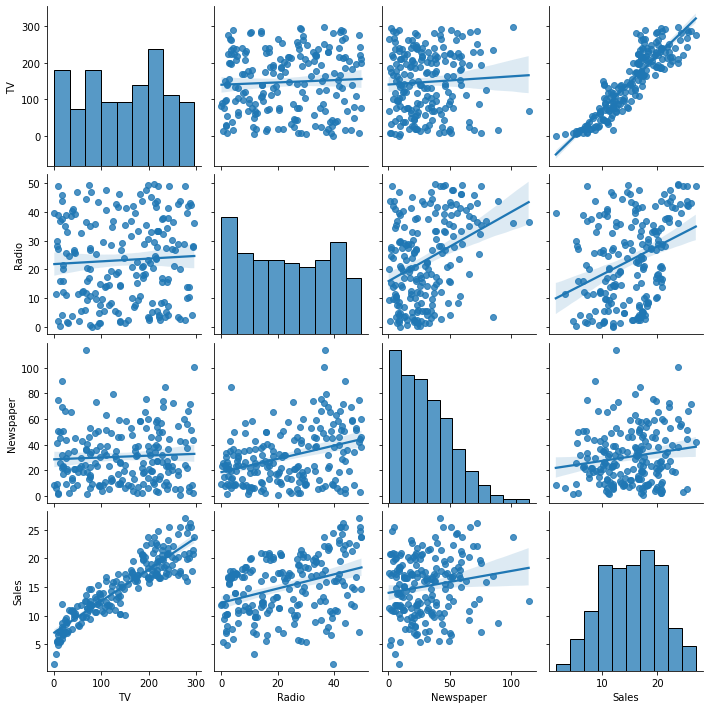

In [8]:
sns.pairplot(dt,kind="reg")

In [9]:
x = dt.iloc[: , :3]
y = dt['Sales']
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


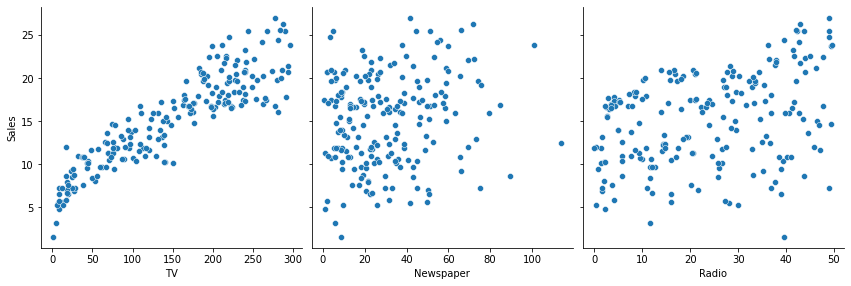

In [10]:
sns.pairplot(dt, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

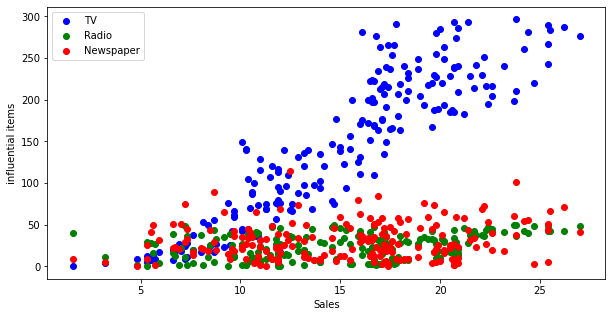

In [11]:
plt.figure(figsize=(10, 5))

plt.scatter(dt['Sales'] ,dt['TV'], c = 'b' , label = 'TV')
plt.scatter(dt['Sales'] , dt['Radio'] , c = 'g',label = 'Radio')
plt.scatter(dt['Sales'] , dt['Newspaper'] , c = 'r' ,label = 'Newspaper')

plt.xlabel('Sales', fontsize=10)
plt.ylabel('influential items', fontsize=10)
plt.legend(fontsize=10)


In [19]:
X = dt[['TV' ,'Newspaper', 'Radio']]
Y = dt['Sales'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",Y_train.shape)
print("Y_test:",Y_test.shape)

X_train: (160, 3)
X_test: (40, 3)
Y_train: (160, 1)
Y_test: (40, 1)


In [20]:
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)

accuracy_reg = reg.score(X_test,Y_test)
print("Linear Regression accuracy is :",accuracy_reg)

MAE = mean_absolute_error(Y_test, Y_pred)
MSE = mean_squared_error(Y_test, Y_pred)
RMSE = np.sqrt(MSE)

print(f'Mean absolute error: {MAE:.2f}')
print(f'Mean squared error: {MSE:.2f}')
print(f'Root mean squared error: {RMSE:.2f}')
print('R is:', reg.score(X_train,Y_train))


Linear Regression accuracy is : 0.9059011844150826
Mean absolute error: 1.27
Mean squared error: 2.91
Root mean squared error: 1.71
R is: 0.9001416005862131


In [21]:
print(reg.coef_)

[[0.05450927 0.00433665 0.10094536]]
